In [1]:
print("hello")

hello


In [ ]:
import pandas as pd
df2 = pd.read_parquet('./data/data_new.parquet')
df2['Date'] = df2['CreatedOn'].dt.date
ts_df = df2.groupby(['StateName', 'Date']).size().reset_index(name='Frequency')
print(ts_df.head())
all_states = ts_df['StateName'].unique()
print(all_states)

/tmp/ipykernel_1068846/3429040698.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ts_df = df2.groupby(['StateName', 'Date']).size().reset_index(name='Frequency')


         StateName        Date  Frequency
0  A AND N ISLANDS  2006-01-17          0
1  A AND N ISLANDS  2006-01-21          0
2  A AND N ISLANDS  2006-08-06          0
3  A AND N ISLANDS  2007-01-01          0
4  A AND N ISLANDS  2007-01-02          0
['A AND N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', ..., 'TELANGANA', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL']
Length: 36
Categories (36, object): ['A AND N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', ..., 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL']


In [4]:
df2.head()

,StateName,DistrictName,Season,Sector,Category,Crop,QueryType,QueryText,CreatedOn,Date
0,UTTAR PRADESH,FAIZABAD,Unknown,AGRICULTURE,Others,Paddy (Dhan),Weather,Farmer asked query on Weather,2023-07-10 15:29:48.487,2023-07-10
1,UTTAR PRADESH,MAU,Unknown,AGRICULTURE,Millets,Maize (Makka),Weather,Farmer asked query on Weather,2023-07-10 15:34:33.657,2023-07-10
2,UTTAR PRADESH,CHITRAKOOT,Unknown,AGRICULTURE,Cereals,Paddy (Dhan),Weather,Farmer asked query on Weather,2023-07-10 15:35:28.257,2023-07-10
3,UTTAR PRADESH,ETAWAH,Unknown,AGRICULTURE,Others,Others,Weather,Farmer asked query on Weather,2023-07-10 15:36:29.770,2023-07-10
4,UTTAR PRADESH,SITAPUR,Unknown,AGRICULTURE,Others,Others,Government Schemes,Information about PM- Kisan Samman Nidhi Yojan...,2023-07-10 15:37:08.363,2023-07-10


In [5]:
top_col2_values = (
    df2.groupby("Crop")
    .size()
    .sort_values(ascending=False)
    .head(10)
    .index
)

top_col2_values

/tmp/ipykernel_1068846/2794655890.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby("Crop")


CategoricalIndex(['Others', 'Paddy (Dhan)', 'Wheat', 'Cotton (Kapas)',
                  'Chillies', 'Onion', 'Groundnut (pea nut/mung phalli)',
                  'Sugarcane (Noble Cane)',
                  'Bengal Gram (Gram/Chick Pea/Kabuli/Chana)',
                  'Soybean (bhat)'],
                 categories=['-1', '0', '1037', '1044', ..., 'lobia', 'rajka bajri.', 'velimasal', 'white rats'], ordered=False, dtype='category', name='Crop')

In [23]:
top_col2_values = top_col2_values.tolist()
top_col2_values

['Others',
 'Paddy (Dhan)',
 'Wheat',
 'Cotton (Kapas)',
 'Chillies',
 'Onion',
 'Groundnut (pea nut/mung phalli)',
 'Sugarcane (Noble Cane)',
 'Bengal Gram (Gram/Chick Pea/Kabuli/Chana)',
 'Soybean (bhat)']

In [8]:
col2 = "Crop"
col1 = "Date"
top_x = 10
print(df2[col2].unique())

['Paddy (Dhan)', 'Maize (Makka)', 'Others', 'Pigeon pea (red gram/arhar/tur)', 'Toria', ..., '8298', '8766', '8413', '8606', '8212']
Length: 952
Categories (952, object): ['-1', '0', '1037', '1044', ..., 'lobia', 'rajka bajri.', 'velimasal', 'white rats']


In [26]:
df_top = df2[df2[col2].isin(top_col2_values)]
x = df_top[col2].unique()


In [27]:
x

['Paddy (Dhan)', 'Others', 'Chillies', 'Sugarcane (Noble Cane)', 'Groundnut (pea nut/mung phalli)', 'Wheat', 'Bengal Gram (Gram/Chick Pea/Kabuli/Chana)', 'Soybean (bhat)', 'Cotton (Kapas)', 'Onion']
Categories (952, object): ['-1', '0', '1037', '1044', ..., 'lobia', 'rajka bajri.', 'velimasal', 'white rats']

In [28]:
df_top.head()

,StateName,DistrictName,Season,Sector,Category,Crop,QueryType,QueryText,CreatedOn,Date
0,UTTAR PRADESH,FAIZABAD,Unknown,AGRICULTURE,Others,Paddy (Dhan),Weather,Farmer asked query on Weather,2023-07-10 15:29:48.487,2023-07-10
2,UTTAR PRADESH,CHITRAKOOT,Unknown,AGRICULTURE,Cereals,Paddy (Dhan),Weather,Farmer asked query on Weather,2023-07-10 15:35:28.257,2023-07-10
3,UTTAR PRADESH,ETAWAH,Unknown,AGRICULTURE,Others,Others,Weather,Farmer asked query on Weather,2023-07-10 15:36:29.770,2023-07-10
4,UTTAR PRADESH,SITAPUR,Unknown,AGRICULTURE,Others,Others,Government Schemes,Information about PM- Kisan Samman Nidhi Yojan...,2023-07-10 15:37:08.363,2023-07-10
6,UTTAR PRADESH,GONDA,Unknown,AGRICULTURE,Cereals,Paddy (Dhan),Weather,Farmer asked query on Weather,2023-07-10 15:39:52.070,2023-07-10


In [ ]:


assert len(df_top[col2].unique()) == top_x, f"Expected {top_x} unique values in {col2}, but got {len(df_top[col2].unique())}"
print("df_top: ", df_top.head())

# --- Time series ---
ts_df = df_top.groupby([col1, col2]).size().unstack(fill_value=0)
ts_df = ts_df.asfreq('D', fill_value=0)

# --- Normalize ---
ts_normalized = (ts_df - ts_df.min()) / (ts_df.max() - ts_df.min())

# --- Distance computation ---
dist_array = pdist(ts_normalized.T, metric='euclidean')
dist_matrix = pd.DataFrame(
    squareform(dist_array),
    index=ts_normalized.columns,
    columns=ts_normalized.columns
)

print(f"len of cols: {len(dist_matrix.columns)}")

# --- Build graph ---
G = nx.Graph()
for node in dist_matrix.columns:
    G.add_node(node)

threshold = dist_matrix.values.mean()
for i in dist_matrix.index:
    for j in dist_matrix.columns:
        if i != j and dist_matrix.loc[i, j] < threshold:
            G.add_edge(i, j, weight=dist_matrix.loc[i, j])

# --- Layout ---
pos = nx.spring_layout(G, seed=42)

edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y, line=dict(width=1, color='#888'),
    hoverinfo='none', mode='lines')

node_x, node_y, node_text = [], [], []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(str(node))

node_trace = go.Scatter(
    x=node_x, y=node_y, mode='markers+text',
    text=node_text, textposition="bottom center",
    hoverinfo='text',
    marker=dict(showscale=False, color='skyblue', size=20, line_width=2))

fig_ng = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title=f'<br>QueryType Similarity Graph (Top {top_x} by Frequency)',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False))
)

return fig_ng



In [2]:
df2["Sector"].unique()

NameError: name 'df2' is not defined

In [4]:
df2.head()

,StateName,DistrictName,Season,Sector,Category,Crop,QueryType,QueryText,CreatedOn,Date
0,UTTAR PRADESH,FAIZABAD,Unknown,AGRICULTURE,Others,Paddy (Dhan),Weather,Farmer asked query on Weather,2023-07-10 15:29:48.487,2023-07-10
1,UTTAR PRADESH,MAU,Unknown,AGRICULTURE,Millets,Maize (Makka),Weather,Farmer asked query on Weather,2023-07-10 15:34:33.657,2023-07-10
2,UTTAR PRADESH,CHITRAKOOT,Unknown,AGRICULTURE,Cereals,Paddy (Dhan),Weather,Farmer asked query on Weather,2023-07-10 15:35:28.257,2023-07-10
3,UTTAR PRADESH,ETAWAH,Unknown,AGRICULTURE,Others,Others,Weather,Farmer asked query on Weather,2023-07-10 15:36:29.770,2023-07-10
4,UTTAR PRADESH,SITAPUR,Unknown,AGRICULTURE,Others,Others,Government Schemes,Information about PM- Kisan Samman Nidhi Yojan...,2023-07-10 15:37:08.363,2023-07-10


In [3]:
query_list = df2["QueryType"].unique()
len(query_list)

74

In [6]:
! pip install wordcloud

  Using cached wordcloud-1.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511 kB)


In [2]:
import pandas as pd
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

parquet_file_path = './data/data_new.parquet'
output_dir = './state_wordcloud_new'

# --- Main Logic ---
print(f"Loading data from: {parquet_file_path}")
try:
    # Read the dataframe
    df2 = pd.read_parquet(parquet_file_path)
    print("Data loaded successfully.")
    # Ensure 'QueryText' is string type and handle potential NaN values
    df2['QueryText'] = df2['QueryText'].fillna('').astype(str)
except FileNotFoundError:
    print(f"Error: Parquet file not found at '{parquet_file_path}'")
    exit()
except Exception as e:
    print(f"Error loading or processing parquet file: {e}")
    exit()

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
print(f"Word clouds will be saved in: {output_dir}")

# Get unique state names
unique_states = df2['StateName'].unique()
print(f"Found {len(unique_states)} unique states.")

# Define additional stopwords (words to ignore in the word cloud)
# Add common words from your specific domain/queries if needed
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    "farmer", "asked", "query", "information", "call", "ask", "asking", "regarding", 
    "kisan", "samman", "nidhi", "yojana", "pm", "hai", "ka", "ke", "test", "status",
    "mein", "me", "k", "ki", "se", "related", "regarding", "give", "control", "help",
    "please", "want", "know", "details", "number", "sir", "madam", "farmer", "problem", 
    "report", "management", "information", "application", "status", "update", "check",
    "want", "need", "madad", "scheme", "District", "jankari", "tell", "mausam", "mosam",
    "crop", "minister", "pradhan", "time", "much","plant", "govt", "government", "state",
    "mantri", "yojna", "mausam", "measure", "jankari", "general", "TELL", "Mausam",
    "lag", "kare", "rahe", "lag", "hain", "raha", "aa", "kab", "de", "ho", "MANIPURI", 
    "EXPERT", "expert", 
    # Add more common Hindi/English/Hinglish stopwords as observed
])

combined_text = ' '.join(df2['QueryText'])
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    stopwords=custom_stopwords,
    min_font_size=10,
    max_words=150, # Limit the number of words shown
    collocations=False # Avoid grouping common word pairs if desired
).generate(combined_text)
plt.figure(figsize=(16, 8)) # Adjust figure size if needed
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") # Hide the axes
output_filename = os.path.join(output_dir, "India_wordcloud.png")
plt.savefig(output_filename, bbox_inches='tight', dpi=300) # bbox_inches avoids cutting off edges
print(f"  Saved word cloud to: {output_filename}")
plt.close()


# Process each state
# for state in unique_states:
#     print(f"\nProcessing state: {state}...")

#     # Filter dataframe for the current state
#     df_state = df2[df2['StateName'] == state]

#     # Combine all query texts for this state into one large string
#     # Use ' '.join() to concatenate all text entries separated by a space
#     combined_text = ' '.join(df_state['QueryText'])

#     if not combined_text or combined_text.isspace():
#         print(f"  Skipping '{state}': No valid query text found.")
#         continue

#     try:
#         # Generate the word cloud
#         wordcloud = WordCloud(
#             width=1600,
#             height=800,
#             background_color='white',
#             stopwords=custom_stopwords,
#             min_font_size=10,
#             max_words=150, # Limit the number of words shown
#             collocations=False # Avoid grouping common word pairs if desired
#         ).generate(combined_text)

#         # Plotting and saving the word cloud
#         plt.figure(figsize=(16, 8)) # Adjust figure size if needed
#         plt.imshow(wordcloud, interpolation='bilinear')
#         plt.axis("off") # Hide the axes

#         # Create a safe filename for the state
#         output_filename = os.path.join(output_dir, f"{state}_wordcloud.png")

#         # Save the figure
#         plt.savefig(output_filename, bbox_inches='tight', dpi=300) # bbox_inches avoids cutting off edges
#         print(f"  Saved word cloud to: {output_filename}")

#         # Close the plot figure to free up memory
#         plt.close()

#     except ValueError as ve:
#          if "negative" in str(ve).lower(): # Specific error for wordcloud with only stopwords
#               print(f"  Skipping '{state}': All words were stopwords or text was too short after processing.")
#          else:
#               print(f"  Error generating word cloud for '{state}': {ve}")
#     except Exception as e:
#         print(f"  An unexpected error occurred for state '{state}': {e}")


print("\nProcessing complete.")

Loading data from: ./data/data_new.parquet
Data loaded successfully.
Word clouds will be saved in: ./state_wordcloud_new
Found 26 unique states.
  Saved word cloud to: ./state_wordcloud_new/India_wordcloud.png

Processing complete.


/tmp/ipykernel_1199345/593865554.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_counts = df_filtered.groupby(['Date', 'QueryType']).size().reset_index(name='count')
/tmp/ipykernel_1199345/593865554.py:28: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = daily_counts.pivot_table(index='Date', columns='QueryType', values='count', fill_value=0)
/tmp/ipykernel_1199345/593865554.py:62: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend


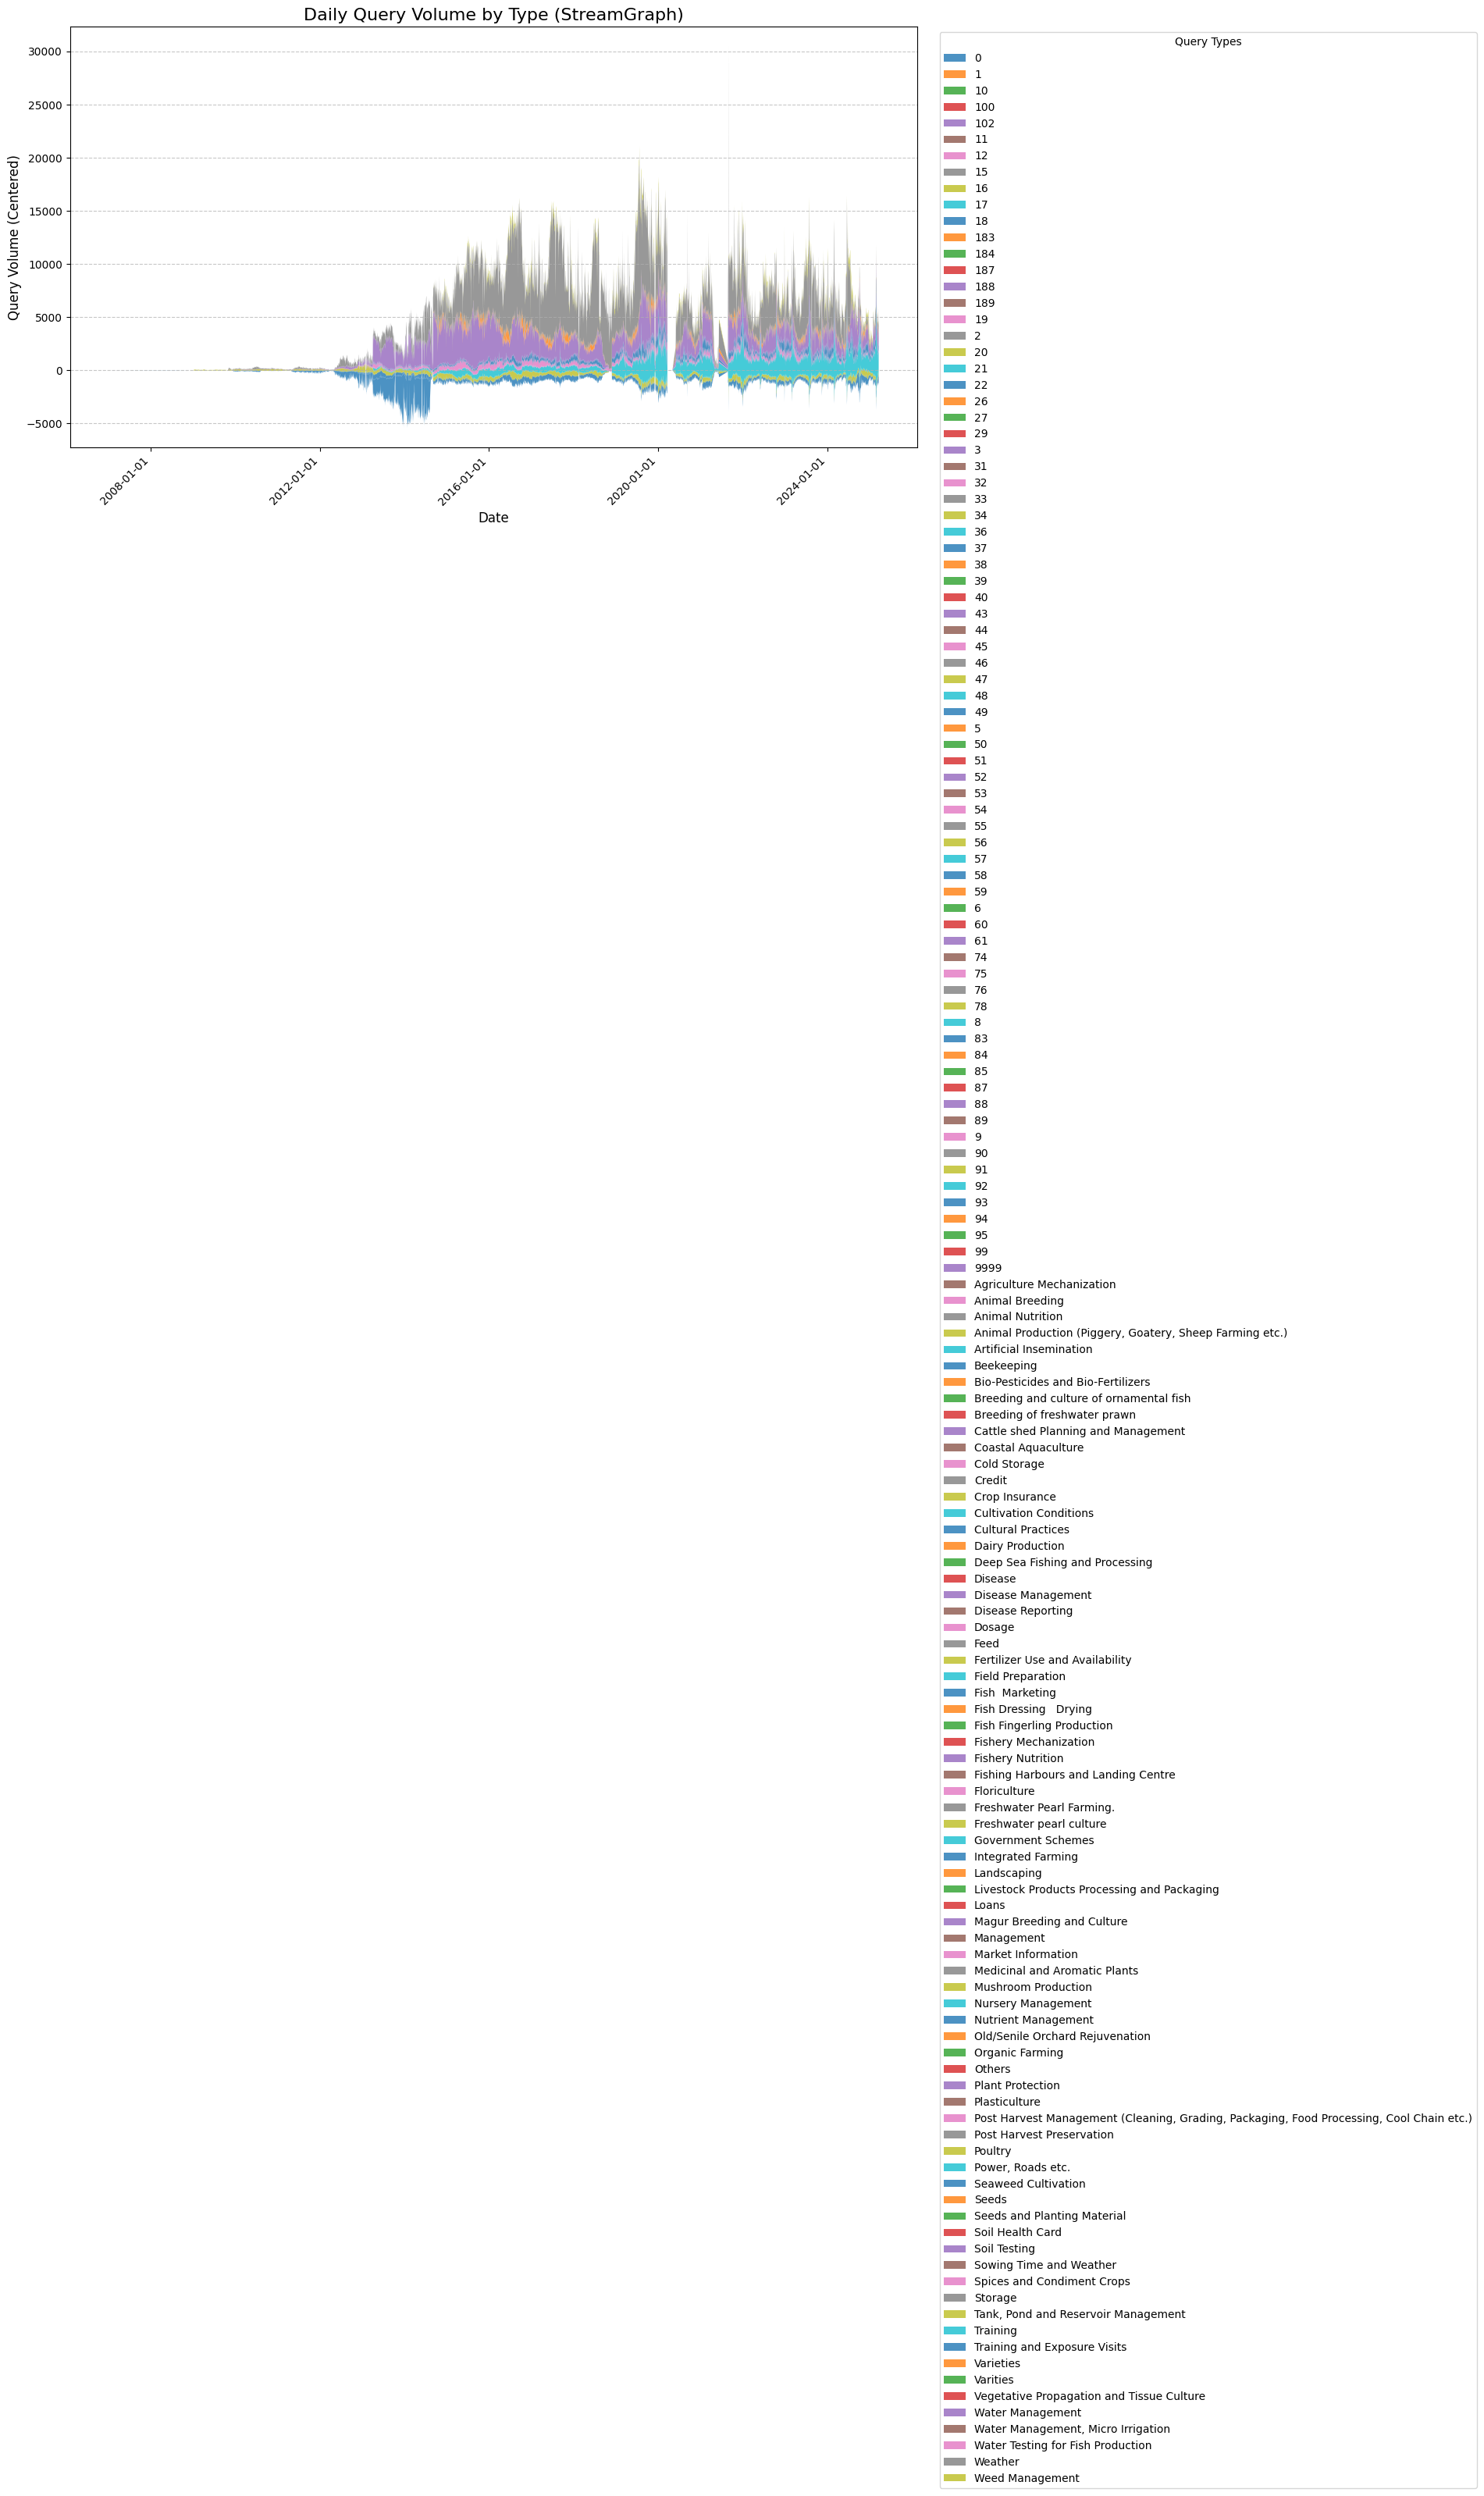

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- 1. Load Data (Assuming df2 is your DataFrame) ---
# Make sure df2 is loaded correctly before this step
# Example loading from CSV if needed:
# df2 = pd.read_csv('your_data.csv')

# Convert 'Date' column to datetime objects if it's not already
# df2['Date'] = pd.to_datetime(df2['Date'])

# Define the categories (topics) you want to track
# If you want to track only the top N query types:
top_n = 10 # Adjust as needed
query_types_to_track = df2['QueryType'].value_counts().nlargest(top_n).index.tolist()
df_filtered = df2[df2['QueryType'].isin(query_types_to_track)].copy() # Use .copy() to avoid SettingWithCopyWarning

# --- 3. Aggregate ---
# Group by date and QueryType, then count occurrences
# Use pd.Grouper to ensure all days in the range are considered if needed,
# although pivot_table handles this too if the index covers the range.
daily_counts = df_filtered.groupby(['Date', 'QueryType']).size().reset_index(name='count')

# --- 4. Pivot & Fill ---
# Pivot the table to get Dates as rows, QueryTypes as columns, and counts as values
# Fill missing combinations (a query type not appearing on a day) with 0
pivot_df = daily_counts.pivot_table(index='Date', columns='QueryType', values='count', fill_value=0)

# Ensure the index is a complete date range if necessary (optional, but good practice)
# If your dates are sparse, this fills in the gaps
# date_range = pd.date_range(start=pivot_df.index.min(), end=pivot_df.index.max(), freq='D')
# pivot_df = pivot_df.reindex(date_range, fill_value=0)


# --- 5. Plot using Matplotlib ---
fig, ax = plt.subplots(figsize=(14, 7))

# Prepare data for stackplot: list of arrays, one for each column (QueryType)
data_to_plot = [pivot_df[col] for col in pivot_df.columns]
labels = pivot_df.columns.tolist()
dates = pivot_df.index

# Create the stackplot with 'wiggle' baseline for the StreamGraph effect
ax.stackplot(dates, data_to_plot,
             labels=labels,
             baseline='wiggle', # This creates the characteristic centered stream effect
             alpha=0.8)

# --- Styling ---
ax.set_title('Daily Query Volume by Type (StreamGraph)', fontsize=16)
ax.set_ylabel('Query Volume (Centered)', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), title="Query Types") # Place legend outside

# Format x-axis dates for better readability
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=10)) # Auto-adjust date ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Format dates as YYYY-MM-DD
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.show()

In [4]:
import torch
from transformers import AutoTokenizer, AutoModel
import numpy as np

model_id = "answerdotai/ModernBERT-base"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModel.from_pretrained(model_id)
model.eval()

def get_bert_embedding(text: str):
    """
    Get ModernBERT embedding for a short phrase using mean pooling.
    Returns a L2-normalized vector for cosine similarity thresholding.
    """
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=64)
    
    with torch.no_grad():
        outputs = model(**inputs)
        token_embeddings = outputs.last_hidden_state.squeeze(0)  # (seq_len, hidden_size)
        attention_mask = inputs["attention_mask"].squeeze(0)     # (seq_len,)
        
        # Only consider non-padding tokens
        mask = attention_mask.unsqueeze(-1).expand(token_embeddings.size())
        masked_embeddings = token_embeddings * mask
        
        summed = masked_embeddings.sum(dim=0)
        count = mask.sum(dim=0)
        mean_pooled = summed / count

        # Normalize to unit vector (L2 norm = 1)
        normed = mean_pooled / mean_pooled.norm(p=2)
        
    return normed.numpy()



In [5]:
query_embeddings = []

for q in query_list:
    embedding = get_bert_embedding(q)
    query_embeddings.append(embedding)

In [7]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import json

In [7]:


# Assume query_embeddings and query_list are already defined
X = np.array(query_embeddings)
similarity_matrix = cosine_similarity(X)
threshold = 0.95

# Create graph
G = nx.Graph()
G.add_nodes_from(range(len(X)))

# Add edges between similar queries
for i in range(len(X)):
    for j in range(i + 1, len(X)):
        if similarity_matrix[i, j] > threshold:
            G.add_edge(i, j)

# Find connected components
components = list(nx.connected_components(G))
query_to_cluster = {}

for cluster_id, component in enumerate(components):
    for idx in component:
        query_to_cluster[query_list[idx]] = cluster_id

# Save as JSON
with open("query_to_cluster.json", "w") as f:
    json.dump(query_to_cluster, f, indent=2, ensure_ascii=False)

print("Mapping saved to query_to_cluster.json")

# Map components to actual queries
# clusters = {
#     i: [query_list[idx] for idx in sorted(component)]
#     for i, component in enumerate(components)
# }

# # Save clusters to a JSON file
# with open("clusters.json", "w") as f:
#     json.dump(clusters, f, indent=2, ensure_ascii=False)

print("Clusters saved to clusters.json")


Mapping saved to query_to_cluster.json
Clusters saved to clusters.json


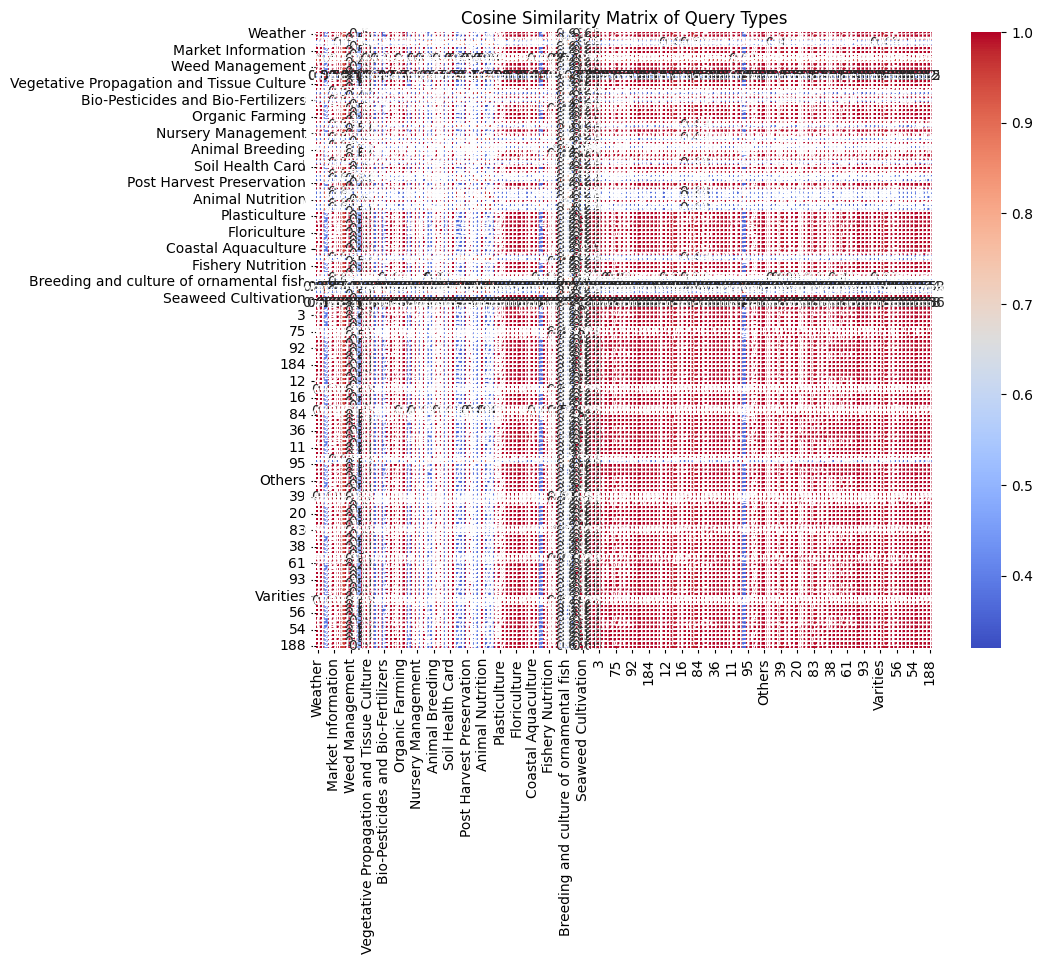

In [10]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
query_embeddings = np.array(query_embeddings)
cosine_sim_matrix = cosine_similarity(query_embeddings)
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=query_list, columns=query_list)
# creat heatmap of cosine similarity matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, annot=True, cmap='coolwarm', square=True)
plt.title('Cosine Similarity Matrix of Query Types')
plt.show()
# cosine_sim_df.to_csv('cosine_similarity_matrix.csv')

In [8]:
a = "weather"
b = "Credit"

embedding_a = get_bert_embedding(a)
embedding_b = get_bert_embedding(b)

similarity = cosine_similarity([embedding_a], [embedding_b])[0][0]
similarity

0.88271123

In [1]:
import json
from collections import defaultdict

# Load the mapping generated by your script
try:
    with open("query_to_cluster.json", "r", encoding="utf-8") as f:
        query_to_cluster = json.load(f)
except FileNotFoundError:
    print("Error: query_to_cluster.json not found. Please run the clustering script first.")
    exit()
except json.JSONDecodeError:
    print("Error: query_to_cluster.json is not valid JSON.")
    exit()


# Invert the mapping: cluster_id -> list of queries
clusters = defaultdict(list)
for query, cluster_id in query_to_cluster.items():
    clusters[cluster_id].append(query)

# Sort clusters by ID and queries within each cluster alphabetically for consistency
sorted_clusters = {
    cluster_id: sorted(queries)
    for cluster_id, queries in sorted(clusters.items())
}

# --- Option 1: Print to Console ---
print("--- Query Clusters ---")
for cluster_id, queries in sorted_clusters.items():
    print(f"\nCluster {cluster_id}:")
    if len(queries) > 50: # Don't print extremely large clusters fully
         print(f"  (Contains {len(queries)} queries, showing first 50)")
         for i, query in enumerate(queries):
             if i < 50:
                 print(f"  - {query}")
             else:
                 break
    else:
        for query in queries:
            print(f"  - {query}")
print("\n--- End of Clusters ---")


# --- Option 2: Save to a new JSON file (like your commented code) ---
output_filename = "clusters_grouped.json"
with open(output_filename, "w", encoding="utf-8") as f:
    json.dump(sorted_clusters, f, indent=2, ensure_ascii=False)

print(f"\nClusters saved nicely grouped to {output_filename}")

# Example of accessing the large cluster (assuming its ID is 11 based on your file)
if 11 in sorted_clusters:
    print(f"\nNumber of items in Cluster 11: {len(sorted_clusters[11])}")

--- Query Clusters ---

Cluster 0:
  - Weather

Cluster 1:
  - Government Schemes

Cluster 2:
  - Sowing Time and Weather

Cluster 3:
  - Seeds and Planting Material

Cluster 4:
  - Market Information

Cluster 5:
  - Plant Protection

Cluster 6:
  - Fertilizer Use and Availability

Cluster 7:
  - Varieties

Cluster 8:
  - Weed Management

Cluster 9:
  - Nutrient Management

Cluster 10:
  - Cultural Practices

Cluster 11:
  (Contains 84 queries, showing first 50)
  - 1
  - 10
  - 100
  - 102
  - 11
  - 12
  - 15
  - 16
  - 17
  - 18
  - 183
  - 184
  - 187
  - 188
  - 189
  - 19
  - 2
  - 20
  - 21
  - 22
  - 26
  - 27
  - 29
  - 3
  - 31
  - 32
  - 33
  - 34
  - 36
  - 37
  - 38
  - 39
  - 40
  - 43
  - 44
  - 45
  - 46
  - 47
  - 48
  - 49
  - 5
  - 50
  - 51
  - 52
  - 53
  - 54
  - 55
  - 56
  - 57
  - 58

Cluster 12:
  - Vegetative Propagation and Tissue Culture

Cluster 13:
  - Crop Insurance

Cluster 14:
  - Field Preparation

Cluster 15:
  - Bio-Pesticides and Bio-Fertilizers

C

In [9]:
# --- Modified Clustering Code (with Preprocessing & Tuning) ---
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import json
from collections import defaultdict

# Assume query_list and get_bert_embedding are defined

# --- Step 1: Pre-process ---
textual_queries = []
numeric_queries = []
query_embeddings_dict = {} # Store embeddings temporarily keyed by query

print("Generating embeddings...")
for q in query_list:
    if isinstance(q, (int, float)) or q.isdigit():
        numeric_queries.append(q)
    else:
        textual_queries.append(q)
        # Assuming get_bert_embedding returns a numpy array or list
        embedding = get_bert_embedding(q)
        query_embeddings_dict[q] = embedding
print(f"Found {len(textual_queries)} textual and {len(numeric_queries)} numeric queries.")

# Prepare embeddings array only for textual queries
textual_embeddings = [query_embeddings_dict[q] for q in textual_queries]
if not textual_embeddings:
    print("No textual queries found to cluster.")
    # Handle case with only numeric queries if necessary
    # ...
else:
    X = np.array(textual_embeddings)

    # --- Step 2: Cluster Textual Queries (Tune Threshold) ---
    similarity_matrix = cosine_similarity(X)
    # *** TRY INCREASING THIS THRESHOLD ***
    threshold = 0.97 # Example: Increased threshold

    G = nx.Graph()
    G.add_nodes_from(range(len(textual_queries)))

    for i in range(len(textual_queries)):
        for j in range(i + 1, len(textual_queries)):
            if similarity_matrix[i, j] > threshold:
                G.add_edge(i, j)

    components = list(nx.connected_components(G))

    # --- Step 3: Map Results ---
    query_to_cluster = {}
    cluster_id_counter = 0

    # Assign cluster IDs to textual queries
    for component in components:
        for node_idx in component:
            query_to_cluster[textual_queries[node_idx]] = cluster_id_counter
        cluster_id_counter += 1

    # Assign a dedicated cluster ID to all numeric queries
    if numeric_queries:
        numeric_cluster_id = cluster_id_counter
        print(f"Assigning Cluster ID {numeric_cluster_id} to all numeric queries.")
        for q_num in numeric_queries:
            # Ensure keys are strings for JSON compatibility if original list had ints
            query_to_cluster[str(q_num)] = numeric_cluster_id
        cluster_id_counter += 1

    # Save the query -> cluster_id mapping
    with open("query_to_cluster_improved.json", "w", encoding="utf-8") as f:
        json.dump(query_to_cluster, f, indent=2, ensure_ascii=False)
    print("Improved mapping saved to query_to_cluster_improved.json")

    # --- Step 4: Generate Grouped Output (Optional but Recommended) ---
    clusters = defaultdict(list)
    for query, cluster_id in query_to_cluster.items():
        clusters[cluster_id].append(query)

    sorted_clusters = {
        cid: sorted(qlist) for cid, qlist in sorted(clusters.items())
    }

    with open("clusters_grouped_improved.json", "w", encoding="utf-8") as f:
        json.dump(sorted_clusters, f, indent=2, ensure_ascii=False)
    print("Improved clusters saved nicely grouped to clusters_grouped_improved.json")

    # Optional: Print grouped clusters to console
    print("\n--- Improved Query Clusters ---")
    for cluster_id, queries in sorted_clusters.items():
        print(f"\nCluster {cluster_id}:")
        # Add logic here to print nicely (like the previous script)
        if len(queries) > 50:
             print(f"  (Contains {len(queries)} queries, showing first 50)")
             for i, query in enumerate(queries):
                 if i < 50:
                     print(f"  - {query}")
                 else:
                     break
        else:
            for query in queries:
                print(f"  - {query}")
    print("\n--- End of Improved Clusters ---")

Generating embeddings...
Found 74 textual and 0 numeric queries.
Improved mapping saved to query_to_cluster_improved.json
Improved clusters saved nicely grouped to clusters_grouped_improved.json

--- Improved Query Clusters ---

Cluster 0:
  - Weather

Cluster 1:
  - Government Schemes

Cluster 2:
  - Sowing Time and Weather

Cluster 3:
  - Seeds and Planting Material

Cluster 4:
  - Market Information

Cluster 5:
  - Plant Protection

Cluster 6:
  - Fertilizer Use and Availability

Cluster 7:
  - Varieties

Cluster 8:
  - Weed Management

Cluster 9:
  - Nutrient Management

Cluster 10:
  - Cultural Practices

Cluster 11:
  - Credit

Cluster 12:
  - Vegetative Propagation and Tissue Culture

Cluster 13:
  - Crop Insurance

Cluster 14:
  - Disease Management
  - Disease Reporting

Cluster 15:
  - Field Preparation

Cluster 16:
  - Bio-Pesticides and Bio-Fertilizers

Cluster 17:
  - Seeds

Cluster 18:
  - Soil Testing

Cluster 19:
  - Integrated Farming

Cluster 20:
  - Organic Farming



In [10]:
# --- Alternative Clustering Code (Agglomerative - Stricter Threshold) ---
import numpy as np
import json
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict

# Assume query_list and get_bert_embedding are defined
# Assume pre-processing (separating numeric queries) is done as before
# textual_queries, numeric_queries, textual_embeddings are available
# X = np.array(textual_embeddings) # Should already exist from pre-processing

if not textual_queries:
     print("No textual queries to cluster.")
     # Handle numeric queries separately if needed
     query_to_cluster = {} # Initialize if only numeric queries exist
else:
    # --- Step 1: Perform Agglomerative Clustering ---
    # *** TRY A LOWER THRESHOLD ***
    # Start with something like 0.12 or 0.10. You may need to experiment.
    # A smaller value means queries need to be *more* similar to cluster.
    new_distance_threshold = 0.10 # <--- TRY ADJUSTING THIS VALUE

    agg_clustering = AgglomerativeClustering(
        n_clusters=None, # Find clusters based on distance
        distance_threshold=new_distance_threshold, # Use the new, lower threshold
        metric='cosine',
        linkage='average' # You could also experiment with 'complete' or 'ward' linkage
    )

    print(f"Performing Agglomerative Clustering with distance threshold {agg_clustering.distance_threshold}...")
    agg_clustering.fit(X)
    labels = agg_clustering.labels_ # These labels might be numpy.int64
    print(f"Found {agg_clustering.n_clusters_} textual clusters.")

    # --- Step 2: Map Results (Convert labels to int) ---
    query_to_cluster = {}
    cluster_id_offset = 0

    for i, query in enumerate(textual_queries):
        query_to_cluster[query] = int(labels[i]) # Convert label to standard Python int

    if labels.size > 0:
        cluster_id_offset = int(max(labels)) + 1
    else:
        cluster_id_offset = 0


# Assign a dedicated cluster ID to all numeric queries
if numeric_queries:
    numeric_cluster_id = cluster_id_offset
    print(f"Assigning Cluster ID {numeric_cluster_id} to all numeric queries.")
    for q_num in numeric_queries:
        query_to_cluster[str(q_num)] = numeric_cluster_id

# --- Step 3: Save and Print Results (No changes needed here) ---

# Save the query -> cluster_id mapping
output_mapping_file = "query_to_cluster_agglo_strict.json"
try:
    with open(output_mapping_file, "w", encoding="utf-8") as f:
        json.dump(query_to_cluster, f, indent=2, ensure_ascii=False)
    print(f"Agglomerative mapping (strict) saved to {output_mapping_file}")
except TypeError as e:
    print(f"Encountered TypeError writing {output_mapping_file}: {e}")

# Generate Grouped Output
clusters = defaultdict(list)
for query, cluster_id in query_to_cluster.items():
    clusters[cluster_id].append(query)

sorted_clusters = {
    cid: sorted(qlist) for cid, qlist in sorted(clusters.items())
}

output_grouped_file = "clusters_grouped_agglo_strict.json"
try:
    with open(output_grouped_file, "w", encoding="utf-8") as f:
        json.dump(sorted_clusters, f, indent=2, ensure_ascii=False)
    print(f"Agglomerative clusters (strict) saved nicely grouped to {output_grouped_file}")
except TypeError as e:
    print(f"Encountered TypeError writing {output_grouped_file}: {e}")

# Print grouped clusters to console
print("\n--- Agglomerative Query Clusters (Strict) ---")
for cluster_id, queries in sorted_clusters.items():
    print(f"\nCluster {cluster_id}:")
    # Adding ellipsis for very long clusters in printout
    max_print = 50
    if len(queries) > max_print:
         print(f"  (Contains {len(queries)} queries, showing first {max_print})")
         for i, query in enumerate(queries):
             if i < max_print:
                 print(f"  - {query}")
             else:
                 print("  - ...")
                 break
    else:
        for query in queries:
            print(f"  - {query}")
print("\n--- End of Agglomerative Clusters (Strict) ---")

Performing Agglomerative Clustering with distance threshold 0.1...
Found 27 textual clusters.
Agglomerative mapping (strict) saved to query_to_cluster_agglo_strict.json
Agglomerative clusters (strict) saved nicely grouped to clusters_grouped_agglo_strict.json

--- Agglomerative Query Clusters (Strict) ---

Cluster 0:
  - Beekeeping
  - Credit
  - Crop Insurance
  - Cultural Practices
  - Dairy Production
  - Disease
  - Disease Management
  - Disease Reporting
  - Feed
  - Field Preparation
  - Management
  - Market Information
  - Others
  - Poultry
  - Storage
  - Training

Cluster 1:
  - Agriculture Mechanization
  - Cultivation Conditions
  - Floriculture
  - Plasticulture

Cluster 2:
  - Coastal Aquaculture
  - Old/Senile Orchard Rejuvenation

Cluster 3:
  - Cattle shed Planning and Management
  - Fishing Harbours and Landing Centre
  - Power, Roads etc.
  - Sowing Time and Weather
  - Tank, Pond and Reservoir Management
  - Training and Exposure Visits

Cluster 4:
  - Livestock P